<a href="https://colab.research.google.com/github/NyadoiElsie/Test-Project/blob/main/Hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello world")

Hello world


In [ ]:
x = "Zuri"
print("My daughter {}, just turned 2 a month ago".format(x))

My daughter Zuri, just turned 2 a month ago


In [ ]:
import pandas as pd
wine = pd.read_csv("/content/drive/MyDrive/winequalityN.csv")

In [ ]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine.shape

(6497, 13)

In [ ]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
wine.groupby(by=["type"])["alcohol"].mean()

type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64

In [ ]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

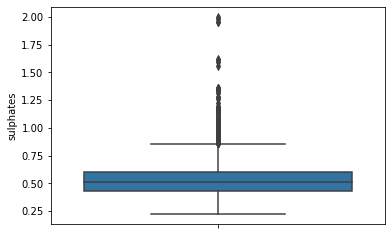

In [ ]:
import pandas as pd
import seaborn as sns
sns.boxplot(y=wine["sulphates"])

Let us work on the outliers by fitting them into an interquartile range

In [ ]:
def del_outliers(cols):
  sorted(cols)
  Q1, Q3 = wine["sulphates"].quantile([0.25, 0.75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

lowgrid,upgrid = del_outliers(wine["sulphates"])
wine["sulphates"] = np.where(wine["sulphates"])<lowgrid, lowgrid, wine["sulphates"]
wine["sulphates"] = np.where(wine["sulphates"])>upgrid, upgrid, wine["sulphates"]

NameError: ignored